Alexandre Beaubien (260747430) & Daniel Hutama (260549127)


In [13]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import os  

In [14]:
PE = numpy.transpose(numpy.loadtxt('potential.csv', delimiter=','))
print PE
#This is the data for the potential energy measured for each distances

[ 0.03675    0.073575   0.1103625  0.14715    0.1839375  0.220725 ]


In [15]:
KE = numpy.transpose(numpy.loadtxt('kinetic.csv', delimiter=','))
print KE
#This is the data for the kinetic energy of the final speed at each distances 

[ 0.04182389  0.08400363  0.12323987  0.15793562  0.19741469  0.24045592]


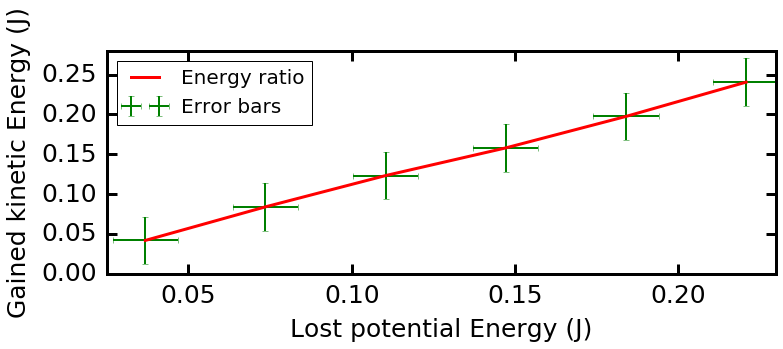

In [33]:
l1,l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 12.0, 4.0, 10.0
fig=plt.figure('Energy', figsize=(s1,s2))
plt.rcParams.update({'font.size': font})
ax= fig.add_subplot(111)
ax.ticklabel_format(useOffset = False)
for axis in ['top', 'bottom','left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length=l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length=l2, pad=padding)

plt.xlabel('Lost potential Energy (J)', labelpad=padding)
plt.ylabel('Gained kinetic Energy (J)',labelpad=padding)
plt.xlim(0.025, 0.23)
plt.ylim(0, 0.28)
#Axis label and format

plt.plot(PE,KE, linewidth=3, color='r')
#Ploting Energy ratio

plt.errorbar(PE, KE, xerr=0.01, yerr=0.03, linewidth=2, color = 'green', linestyle = 'none')
#Ploting the error bars

plt.legend(['Energy ratio', 'Error bars'], loc='upper left', fontsize=20)
#formating the legend

plt.show()

Fig. 1) Ratio between lost potentil energy and gained kinetic energy. We can see that it is a linear fonction.  

**Let's define some terms for the best-fit line:

In [17]:
#These are terms needed to calculate the max/min best-fit lines

def aCU(y, x, slope, intercept):
    x_1 = []
    for i in x:
        x_1.append(slope*i)
    values_to_be_summed = []
    for j in y:
        for i in x_1:
            values_to_be_summed.append(j - i - intercept)
    square_values = []
    for k in values_to_be_summed:
        square_values.append(k**2)
    return numpy.sqrt(sum(square_values)/float(len(square_values)-2))
#This is the common uncertainty

def delta(x):
    x_squared = []
    for i in x:
        x_squared.append(i**2)
    return sum(x_squared)*float(len(x))-(sum(x))**2
#This is the value delta

def alpha_b(x, aCU):
    x_squared = []
    for i in x:
        x_squared.append(i**2)
    return aCU*numpy.sqrt(sum(x_squared)/delta(PE))
#This is the uncertainty in the intercept

def alpha_m(aCU):
    return aCU*numpy.sqrt(float(len(PE))/delta(PE))
#This is the uncertainty in the gradient (slope)

**Defining Best-fit + max/min line for Energy ratio

In [18]:
distance_value = numpy.linspace(min(PE), max(PE))
def mean_function(x):
    return sum(x)/float(len(x))
# Returns the mean of a list x.
def cov_function(x,y):
    lxy = []
    for i,j in zip(x,y): 
        lxy.append((i-mean_function(x))*(j-mean_function(y)))
    return sum(lxy)/float(len(x)-1)
# Returns the covariance of the elements of lists x and y.

m = cov_function(PE, KE)/cov_function(PE,PE)
b = mean_function(KE)-m*mean_function(PE)

def regression_line(distance_value):
    return m*distance_value + b
#Best-fit line for Energy ratio 

def max_reglin(distance_value):
    return (m-alpha_m(aCU(KE,PE,m,b)))*distance_value + (b+alpha_b(PE, aCU(KE,PE,m,b)))
#Max best-fit line for Energy ratio

def min_reglin(distance_value):
    return (m+alpha_m(aCU(KE,PE,m,b)))*distance_value + (b-alpha_b(PE, aCU(KE,PE,m,b)))
#Min best-fit line for Energy ratio

print "The simple linear regression equation is Energy ratio = {}*distance + {}.".format("%.2E" % m, "%.2E" % b)

The simple linear regression equation is Energy ratio = 1.06E+00*distance + 4.03E-03.


**Graph for 2(b)

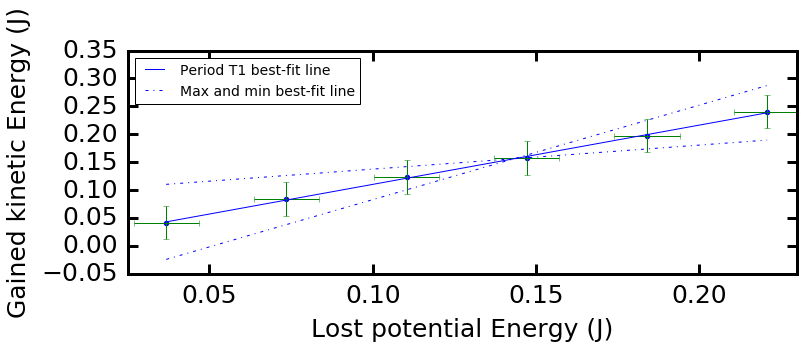

In [29]:
l1,l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 12.0, 4.0, 10.0
fig=plt.figure('Energy Ratio', figsize=(s1,s2))
plt.rcParams.update({'font.size': font})
ax= fig.add_subplot(111)
ax.ticklabel_format(useOffset = False)
for axis in ['top', 'bottom','left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length=l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length=l2, pad=padding)
    
plt.xlabel('Lost potential Energy (J)', labelpad=padding)
plt.ylabel('Gained kinetic Energy (J)',labelpad=padding)
plt.xlim(0.025, 0.23)
#Axis labeling and formating

plt.scatter(PE, KE, color='blue')
#Energy in scatter value

plt.plot(distance_value, regression_line(distance_value), color= 'blue')
#Best-fit lines for Energy ratio

plt.plot(distance_value, max_reglin(distance_value), color='b',linestyle='-.')
plt.plot(distance_value, min_reglin(distance_value), color='b',linestyle='-.')
#Max and min best-fit line for Energy ratio

plt.errorbar(PE, KE, xerr=0.01, yerr=0.03, linestyle='none', color='green')
#error bars for Energy ratio

plt.legend(['Period T1 best-fit line', 'Max and min best-fit line'], loc='upper left', fontsize=14)
#legend formating

plt.show()


Fig. 2) Best-fit line for our Energy ratio between lost potential energy and gained kinetic energy. We can that the linear line goes into every error bar, which is somewhat abnormal.

Graph 3, ploting the residuals

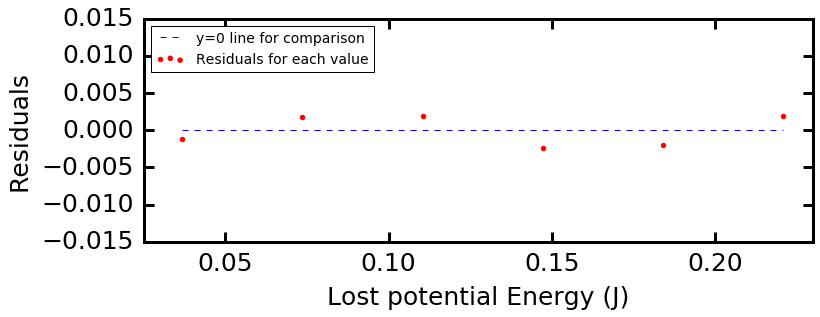

In [28]:
Residual = KE - regression_line(PE)
l1,l2, font, s1, s2, padding = 3.0, 10.0, 25.0, 12.0, 4.0, 10.0
fig=plt.figure('Residual', figsize=(s1,s2))
plt.rcParams.update({'font.size': font})
ax= fig.add_subplot(111)
ax.ticklabel_format(useOffset = False)
for axis in ['top', 'bottom','left', 'right']:
    ax.spines[axis].set_linewidth(l1)
    ax.xaxis.set_tick_params(width=l1, length=l2, pad=padding)
    ax.yaxis.set_tick_params(width=l1, length=l2, pad=padding)
    
plt.xlabel('Lost potential Energy (J)', labelpad=padding)
plt.ylabel('Residuals',labelpad=padding)
plt.xlim(0.025, 0.23)
#Axis labeling and formating

plt.scatter(PE, Residual, color='r')
plt.plot(PE, 0*PE, linestyle='--')
#Residuals in scatter value

plt.legend(['y=0 line for comparison','Residuals for each value'], loc='upper left', fontsize=14)
#legend formating

plt.show()


Fig 3) These are the residuals between or value of gained kinetic energy and the predicted one by our regression line. 

In [46]:
Residual

array([-0.00124858,  0.00180868,  0.00196228, -0.00242461, -0.00202818,
        0.00193041])